<a href="https://colab.research.google.com/github/Majof4/Dataset-MachineLearning-finalexamen/blob/main/ITAI1371_final_project_group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Load dataset

In [ ]:
import pandas as pd

# URL del archivo en GitHub (RAW)
url = "https://raw.githubusercontent.com/Majof4/Dataset-MachineLearning-finalexamen/main/Clean_data_set_final.csv"

# Cargar el dataset
df = pd.read_csv(url)

print("Dataset loaded successfully from GitHub. Showing first 5 rows:")
print(df.head())

Dataset loaded successfully from GitHub. Showing first 5 rows:
   age  hours.per.week  marital_grouped_num  occupation_grouped_num  \
0   90              40                    0                       1   
1   82              18                    0                       1   
2   66              40                    0                       1   
3   54              40                    0                       3   
4   41              40                    0                       1   

   relationship_grouped_num  race_num  sex_num  income_numeric  \
0                         2         1        2               1   
1                         2         1        2               1   
2                         2         2        2               1   
3                         2         1        2               1   
4                         3         1        2               1   

   education_group  
0                3  
1                3  
2                3  
3                1  
4       

Step 2.  Inspect Data Variables and Types
The loaded df DataFrame is examined to determine its structure. This includes reviewing the column names, verifying the data types associated with each variable, and identifying any missing values. Conducting this initial assessment provides a clear understanding of the dataset’s quality and informs the subsequent steps required for data cleaning, encoding, and transformation.

In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29735 entries, 0 to 29734
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       29735 non-null  int64
 1   hours.per.week            29735 non-null  int64
 2   marital_grouped_num       29735 non-null  int64
 3   occupation_grouped_num    29735 non-null  int64
 4   relationship_grouped_num  29735 non-null  int64
 5   race_num                  29735 non-null  int64
 6   sex_num                   29735 non-null  int64
 7   income_numeric            29735 non-null  int64
 8   education_group           29735 non-null  int64
dtypes: int64(9)
memory usage: 2.0 MB

Missing values per column:
age                         0
hours.per.week              0
marital_grouped_num         0
occupation_grouped_num      0
relationship_grouped_num    0
race_num                    0
sex_num                     0
income_numeric   

# **Step 2. Split Data into Train, Validation, and Test Sets (70%/15%/15%)**
Divide into training, validation, and test sets. The training set will comprise 70% of the data, while both validation and test sets will each receive 15% of the data. This split will be performed using sklearn.model_selection.train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the random state for reproducibility
# The value 42 is used as a fixed random_state to ensure reproducible results
# during data splitting and model training, allowing consistent comparisons.
RANDOM_STATE = 42

# Split the DataFrame into training (70%) and temporary (30%) sets
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=RANDOM_STATE)

# Split the temporary DataFrame into validation (15% of original) and test (15% of original) sets
# Since temp_df is 30% of the original, splitting it 50/50 will result in 15% each.
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=RANDOM_STATE)

# Print the shapes of the resulting DataFrames to verify the split
print(f"Shape of training set (70%): {train_df.shape}")
print(f"Shape of validation set (15%): {val_df.shape}")
print(f"Shape of test set (15%): {test_df.shape}")

Shape of training set (70%): (20814, 9)
Shape of validation set (15%): (4460, 9)
Shape of test set (15%): (4461, 9)


In [ ]:
# Export the training, validation, and test subsets to CSV files
# to facilitate external analysis, documentation, and model reproducibility.
train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('val_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

print("Training, validation, and test datasets saved as 'train_dataset.csv', 'val_dataset.csv', and 'test_dataset.csv' respectively.")

Training, validation, and test datasets saved as 'train_dataset.csv', 'val_dataset.csv', and 'test_dataset.csv' respectively.


# **Step 3 Prepare Data for Modeling**
Separate the features (X) from the target variable (y) using the train_df, val_df, and test_df dataframes.'income_numeric' is the target variable based on the previous context.
This code:

*   Identify the target variable.
*   Separates features (X) and target (y) for each dataset split.
*   Ensures the model receives the correct inputs.
*   Verifies that the shapes are consistent.






In [ ]:
TARGET_COLUMN = 'income_numeric' #This line specifies which column is the target “this is my y, everything else will be X.

# Separate features (X) and target (y) for the training set
X_train = train_df.drop(columns=[TARGET_COLUMN])
y_train = train_df[TARGET_COLUMN]

# Separate features (X) and target (y) for the validation set
X_val = val_df.drop(columns=[TARGET_COLUMN])
y_val = val_df[TARGET_COLUMN]

# Separate features (X) and target (y) for the test set
X_test = test_df.drop(columns=[TARGET_COLUMN])
y_test = test_df[TARGET_COLUMN]

# Print the shapes of the new datasets to verify the separation
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (20814, 8), y_train shape: (20814,)
X_val shape: (4460, 8), y_val shape: (4460,)
X_test shape: (4461, 8), y_test shape: (4461,)


# **Step 4. Training and evaluate Logistic Regression**
Logistic Regression is a supervised classification algorithm that models the relationship between a set of input features and a binary outcome by estimating the probability that an instance belongs to the positive class. It uses the logistic (sigmoid) function to convert linear combinations of the predictors into values between 0 and 1, allowing the model to make probability-based decisions. Because of its mathematical simplicity, Logistic Regression provides interpretable coefficients that show how each feature influences the likelihood of the target event occurring.

Summary of What the Code Does

- Creates a Logistic Regression model using a fixed random state for reproducibility and a higher number of iterations (max_iter=1000) to ensure the algorithm converges.

- Trains the model on the training dataset (X_train, y_train), allowing the algorithm to learn patterns that separate the two income classes.

- Generates predictions on the validation dataset (X_val) to evaluate performance on unseen data.

- Calculates accuracy, which measures how many validation predictions were correct.

- Produces a classification report that includes precision, recall, F1-score, and support for both classes.

- Prints the evaluation results, providing a clear performance summary of the Logistic Regression model on the validation set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Logistic Regression model
# Set random_state for reproducibility and max_iter to prevent convergence warnings
logistic_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

# Train the model on the training data
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the validation set
y_pred_lr = logistic_model.predict(X_val)

# Evaluate the model
accuracy_lr = accuracy_score(y_val, y_pred_lr)
report_lr = classification_report(y_val, y_pred_lr)

print(f"\nLogistic Regression Accuracy on Validation Set: {accuracy_lr:.4f}")
print("\nLogistic Regression Classification Report on Validation Set:\n")
print(report_lr)


Training Logistic Regression model...
Training complete.

Logistic Regression Accuracy on Validation Set: 0.8173

Logistic Regression Classification Report on Validation Set:

              precision    recall  f1-score   support

           1       0.85      0.92      0.88      3346
           2       0.68      0.52      0.58      1114

    accuracy                           0.82      4460
   macro avg       0.76      0.72      0.73      4460
weighted avg       0.81      0.82      0.81      4460



# **Step 4. Training and evaluate Decission Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Train the model on the training data
print("Training Decision Tree Classifier model...")
decision_tree_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the validation set
y_pred_dt = decision_tree_model.predict(X_val)

# Evaluate the model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
report_dt = classification_report(y_val, y_pred_dt)

print(f"\nDecision Tree Classifier Accuracy on Validation Set: {accuracy_dt:.4f}")
print("\nDecision Tree Classifier Classification Report on Validation Set:\n")
print(report_dt)

Training Decision Tree Classifier model...
Training complete.

Decision Tree Classifier Accuracy on Validation Set: 0.7937

Decision Tree Classifier Classification Report on Validation Set:

              precision    recall  f1-score   support

           1       0.84      0.89      0.87      3346
           2       0.60      0.50      0.55      1114

    accuracy                           0.79      4460
   macro avg       0.72      0.70      0.71      4460
weighted avg       0.78      0.79      0.79      4460



# **Step 5. Training and evaluate Radom Forest Clasifier**
A Random Forest Classifier is an ensemble machine learning algorithm that builds multiple decision trees during training and combines their predictions to improve accuracy and stability. Each tree is trained on a random subset of the data and a random subset of the features, which reduces overfitting and increases generalization. The final prediction is made through a majority vote across all trees, making the Random Forest a powerful and reliable method for classification tasks.

Summary of What the Code Does

- Creates a Random Forest Classifier using a fixed random_state to ensure reproducible results.

- Trains the model on the training dataset (X_train, y_train).
During this process, the algorithm builds multiple decision trees and learns patterns from the data.

- Generates predictions on the validation set (X_val) by letting the trained forest vote on each sample’s class.

- Computes accuracy, showing the proportion of correct predictions on the validation data.

- Produces a full classification report, which includes precision, recall, F1-score, and support for each class.

- Prints the performance results, providing a clear evaluation of how well the Random Forest model performs on unseen validation data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=RANDOM_STATE)

# Train the model on the training data
print("Training Random Forest Classifier model...")
random_forest_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the validation set
y_pred_rf = random_forest_model.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)

print(f"\nRandom Forest Classifier Accuracy on Validation Set: {accuracy_rf:.4f}")
print("\nRandom Forest Classifier Classification Report on Validation Set:\n")
print(report_rf)

Training Random Forest Classifier model...
Training complete.

Random Forest Classifier Accuracy on Validation Set: 0.8072

Random Forest Classifier Classification Report on Validation Set:

              precision    recall  f1-score   support

           1       0.86      0.89      0.87      3346
           2       0.63      0.55      0.59      1114

    accuracy                           0.81      4460
   macro avg       0.74      0.72      0.73      4460
weighted avg       0.80      0.81      0.80      4460



# **Step 7. Gradient Booting Classifier (XT Boot)**

XGBoost (Extreme Gradient Boosting) is a high-performance gradient boosting algorithm that builds an ensemble of decision trees in a sequential way, where each new tree focuses on correcting the errors of the previous ones. It uses optimized regularization, shrinkage, and efficient handling of missing values, making it one of the most accurate and scalable models for binary classification. The binary:logistic objective outputs probabilities for two classes, which are then converted into class predictions.

Summary of What the Code Does

Prepares the target variable for XGBoost
The model requires binary labels encoded as 0 and 1, so the code transforms the target from [1, 2] into [0, 1].

Creates an XGBoost Classifier

Uses binary:logistic as the objective for binary classification.

Sets eval_metric='logloss' to monitor training performance.

Includes random_state for reproducible results.

Trains the model on the training dataset (X_train, y_train_xgb).
XGBoost builds boosted trees that learn from previous errors to improve prediction accuracy.

Generates predictions on the validation set (X_val).

Evaluates the model

Computes accuracy using the transformed validation target (y_val_xgb).

Produces a classification report containing precision, recall, F1-score, and support.

Prints the evaluation results, summarizing how well the XGBoost classifier performs on unseen validation data.


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Transform target variables from [1, 2] to [0, 1] for XGBoost binary classification
y_train_xgb = y_train - 1
y_val_xgb = y_val - 1

# Instantiate the XGBoost Classifier model
# Use 'objective' for binary:logistic for binary classification and 'eval_metric' for monitoring performance
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=RANDOM_STATE)

# Train the model on the training data
print("Training Gradient Boosting (XGBoost) Classifier model...")
xgb_model.fit(X_train, y_train_xgb)
print("Training complete.")

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model using the transformed y_val_xgb
accuracy_xgb = accuracy_score(y_val_xgb, y_pred_xgb)
report_xgb = classification_report(y_val_xgb, y_pred_xgb)

print(f"\nGradient Boosting (XGBoost) Classifier Accuracy on Validation Set: {accuracy_xgb:.4f}")
print("\nGradient Boosting (XGBoost) Classifier Classification Report on Validation Set:\n")
print(report_xgb)

Training Gradient Boosting (XGBoost) Classifier model...
Training complete.

Gradient Boosting (XGBoost) Classifier Accuracy on Validation Set: 0.8260

Gradient Boosting (XGBoost) Classifier Classification Report on Validation Set:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3346
           1       0.68      0.58      0.63      1114

    accuracy                           0.83      4460
   macro avg       0.77      0.74      0.76      4460
weighted avg       0.82      0.83      0.82      4460



# **texto en negrita Step 8. Training and evaluate K-nearest Neigboad Classifier model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the K-Nearest Neighbors Classifier model
# Using n_neighbors=5 as a common starting point
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
print("Training K-Nearest Neighbors Classifier model...")
knn_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the validation set
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
report_knn = classification_report(y_val, y_pred_knn)

print(f"\nK-Nearest Neighbors Classifier Accuracy on Validation Set: {accuracy_knn:.4f}")
print("\nK-Nearest Neighbors Classifier Classification Report on Validation Set:\n")
print(report_knn)

Training K-Nearest Neighbors Classifier model...
Training complete.

K-Nearest Neighbors Classifier Accuracy on Validation Set: 0.8038

K-Nearest Neighbors Classifier Classification Report on Validation Set:

              precision    recall  f1-score   support

           1       0.85      0.89      0.87      3346
           2       0.63      0.54      0.58      1114

    accuracy                           0.80      4460
   macro avg       0.74      0.71      0.72      4460
weighted avg       0.80      0.80      0.80      4460



# **Step 9. Training and evaluate Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Support Vector Classifier model
# Set random_state for reproducibility. SVC can be computationally intensive.
svc_model = SVC(random_state=RANDOM_STATE)

# Train the model on the training data
print("Training Support Vector Classifier model...")
svc_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the validation set
y_pred_svc = svc_model.predict(X_val)

# Evaluate the model
accuracy_svc = accuracy_score(y_val, y_pred_svc)
report_svc = classification_report(y_val, y_pred_svc)

print(f"\nSupport Vector Classifier Accuracy on Validation Set: {accuracy_svc:.4f}")
print("\nSupport Vector Classifier Classification Report on Validation Set:\n")
print(report_svc)

Training Support Vector Classifier model...
Training complete.

Support Vector Classifier Accuracy on Validation Set: 0.8211

Support Vector Classifier Classification Report on Validation Set:

              precision    recall  f1-score   support

           1       0.84      0.94      0.89      3346
           2       0.72      0.46      0.56      1114

    accuracy                           0.82      4460
   macro avg       0.78      0.70      0.72      4460
weighted avg       0.81      0.82      0.81      4460



## **Section B. Validate and Compare**

# **# Step 10. Validate and Compare Models (Accuracy, Precision, Recall, F1, ROC-AUC)**

Accuracy: Measures how often the model correctly predicts both positive and negative cases out of all predictions.
Precision: Measures the proportion of predicted positive cases that are actually positive.
Recall: Measures the proportion of real positive cases that the model successfully identifies.
F1-Score: Combines precision and recall into a single balanced metric using their harmonic mean.
ROC-AUC: Measures how well the model separates positive and negative classes across all classification thresholds.

What does the code

-It takes all your trained models (Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, SVC) and puts them together for evaluation.

-It uses each model to make predictions on the validation dataset.

-It chooses the correct version of the target labels for each model (0/1 for XGBoost, 1/2 for the others) so the metrics are computed correctly.

-For every model, it calculates the main performance metrics: accuracy, precision, recall, F1-score, and ROC-AUC (when the model provides scores or probabilities).

-It stores all these metrics in a structured way so each model has its own “row” of results.

-Finally, it builds a comparison table with all models and their metrics and orders them by accuracy, so you can quickly see which model performed best on the validation set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model,
    "KNN": knn_model,
    "SVC": svc_model
}

# Prepare to store results
results = []

for name, model in models.items():
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Determine which y_val to use based on the model (XGBoost uses y_val_xgb, others use y_val)
    # Also handle SVC's predict_proba / decision_function for ROC AUC
    if name == "XGBoost":
        current_y_val = y_val_xgb
    else:
        current_y_val = y_val

    accuracy = accuracy_score(current_y_val, y_val_pred)

    # For precision, recall, f1-score, need to ensure target is 0/1 for binary, and pos_label is set correctly.
    # For models that were trained on 1/2, convert y_val to 0/1 for metrics calculation if pos_label=1 is used for the positive class (2).
    # Or ensure that pos_label matches the positive class in current_y_val.
    # Assuming 1 is the positive class for the transformed 0/1 targets and 2 for the original 1/2 targets.
    if name == "XGBoost": # XGBoost target is 0/1
        precision = precision_score(current_y_val, y_val_pred, average="binary", pos_label=1)
        recall = recall_score(current_y_val, y_val_pred, average="binary", pos_label=1)
        f1 = f1_score(current_y_val, y_val_pred, average="binary", pos_label=1)
    else: # Other models trained on 1/2. We assume 2 is the positive class.
        precision = precision_score(current_y_val, y_val_pred, average="binary", pos_label=2)
        recall = recall_score(current_y_val, y_val_pred, average="binary", pos_label=2)
        f1 = f1_score(current_y_val, y_val_pred, average="binary", pos_label=2)


    # ROC AUC calculation
    roc_auc = None # Initialize to None
    try:
        if hasattr(model, "predict_proba") and model.predict_proba is not None: # Check if predict_proba exists and is not None
            y_val_proba = model.predict_proba(X_val)[:, 1] # Probability of the positive class (index 1 for 0/1, or for 2 if classes are 1,2 and 2 is at index 1)
            if name == "XGBoost":
                roc_auc = roc_auc_score(current_y_val, y_val_proba)
            else: # For other models that had 1/2 as target, convert y_val to 0/1 for roc_auc_score
                roc_auc = roc_auc_score(y_val - 1, y_val_proba)
        elif hasattr(model, "decision_function"): # For SVC, if probability=False
            y_val_score = model.decision_function(X_val)
            if name == "XGBoost":
                roc_auc = roc_auc_score(current_y_val, y_val_score)
            else: # For other models that had 1/2 as target, convert y_val to 0/1 for roc_auc_score
                roc_auc = roc_auc_score(y_val - 1, y_val_score)
    except Exception as e:
        print(f"Could not calculate ROC AUC for {name}: {e}")

    results.append({
        "model": name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    })

# Display results
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='accuracy', ascending=False))

,model,accuracy,precision,recall,f1,roc_auc
3,XGBoost,0.826009,0.676409,0.581688,0.625483,0.878090
5,SVC,0.821076,0.723796,0.458707,0.561538,0.871732
0,Logistic Regression,0.817265,0.676090,0.515260,0.584819,0.870489
2,Random Forest,0.807175,0.632017,0.545781,0.585742,0.846919
4,KNN,0.803812,0.625131,0.535907,0.577090,0.819343
1,Decision Tree,0.793722,0.604752,0.502693,0.549020,0.762241


# **Step 11. Validate and Compare Model performance**

This step evaluates how well each trained model performs on unseen validation data by calculating multiple performance metrics. It ensures a fair comparison between all models and identifies which ones produce the most accurate and reliable predictions.

Summary of What This Step Does

- Collects all trained models into one place so they can be evaluated together.

- Uses each model to predict the validation labels.

- Applies the correct version of the target labels for each model (because XGBoost uses 0/1 and the others use 1/2).

- Calculates key evaluation metrics for every model:Accuracy, Precision, Recall,F1-score, and ROC-AUC (when available)

- Stores all performance metrics for each model in a structured table.

- Displays the results, ranking models by accuracy so you can easily identify the best performers.

- If you want, I can also write this in a more academic or more conversational style.

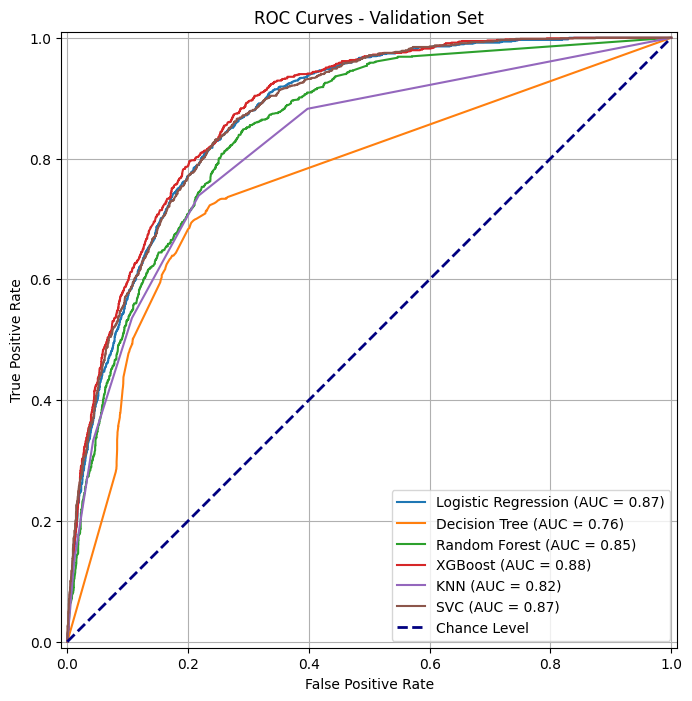

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == "XGBoost":
        current_y_val_binary = y_val_xgb
        # XGBoost predicts probabilities for class 1 (our positive class)
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:
        # For other models, y_val is [1, 2]. Convert to [0, 1] for roc_curve
        current_y_val_binary = y_val - 1
        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1] # Assumes positive class (2) is at index 1 after [1,2] -> [0,1] mapping
        elif hasattr(model, "decision_function"):
            y_val_proba = model.decision_function(X_val)
        else:
            # If neither predict_proba nor decision_function, skip or raise error
            print(f"Model {name} does not have predict_proba or decision_function. Skipping ROC plot.")
            continue

    # Plot ROC curve for the current model
    RocCurveDisplay.from_predictions(
        current_y_val_binary,
        y_val_proba,
        name=name,
        pos_label=1, # Explicitly set positive label as 1 after conversion
        ax=plt.gca() # Plot on the current axes
    )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance Level')
plt.title("ROC Curves - Validation Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Section C. Ensamble Model**

# **Step 12. Preparing Target Variables for Ensemble Models**

In [ ]:
# Convert y_test to binary 0/1 for consistency, matching y_train_xgb and y_val_xgb
y_test_xgb = y_test - 1

print(f"Original y_train unique values: {sorted(y_train.unique())}")
print(f"Binary y_train_xgb unique values: {sorted(y_train_xgb.unique())}\n")

print(f"Original y_val unique values: {sorted(y_val.unique())}")
print(f"Binary y_val_xgb unique values: {sorted(y_val_xgb.unique())}\n")

print(f"Original y_test unique values: {sorted(y_test.unique())}")
print(f"Binary y_test_xgb unique values: {sorted(y_test_xgb.unique())}")

Original y_train unique values: [np.int64(1), np.int64(2)]
Binary y_train_xgb unique values: [np.int64(0), np.int64(1)]

Original y_val unique values: [np.int64(1), np.int64(2)]
Binary y_val_xgb unique values: [np.int64(0), np.int64(1)]

Original y_test unique values: [np.int64(1), np.int64(2)]
Binary y_test_xgb unique values: [np.int64(0), np.int64(1)]


# **Step 13. Select Top 3 Models Based on Validation Accuracy**

This step identifies the three best-performing models from the `results_df` DataFrame based on their accuracy on the validation set. This selection is crucial for focusing further analysis or for building more sophisticated ensemble models with proven base learners.

In [ ]:

# Define the list of models to consider for the top 3 selection (original 6)
initial_models_to_consider = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
    "KNN",
    "SVC"
]

# Filter results_df to only include these initial models
filtered_results_df = results_df[results_df['model'].isin(initial_models_to_consider)]

top3_names = (
    filtered_results_df
    .sort_values(by="accuracy", ascending=False)
    .head(3)["model"]
    .tolist()
)

print("Top 3 models (from initial 6):", top3_names)

# top3_models should still retrieve from the full 'models' dictionary
top3_models = [models[name] for name in top3_names]

Top 3 models (from initial 6): ['XGBoost', 'SVC', 'Logistic Regression']


# **Step 14. Ensemble Method: Soft Voting with Probabilistic Averaging**

An averaging ensemble, or soft voting, combines the probabilistic predictions of multiple models. For each instance, it averages the predicted probabilities of the positive class from selected base models. The final prediction for an instance is then determined by comparing this averaged probability to a threshold (e.g., 0.5). This approach helps to smooth out individual model biases and can lead to more robust predictions, especially when the base models are diverse but perform well.

Here, we define helper functions to get positive class probabilities and evaluate model performance from these probabilities. Then, we apply these to our `top3_models` to create and evaluate the averaging ensemble.

In [ ]:
# ============================================================
# Soft Voting Ensemble (Averaging Predictions of Top 3 Models)
# ============================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Helper: extract positive-class probabilities
# ------------------------------------------------------------
def get_positive_proba(model, X):
    """
    Returns probability estimates for the positive class (label = 1).
    Supports models with predict_proba or decision_function.
    """
    # Case 1: model provides predict_proba
    if hasattr(model, 'predict_proba'):
        prob = model.predict_proba(X)
        classes = model.classes_
        pos_label = 1

        if pos_label in classes:
            pos_index = list(classes).index(pos_label)
            return prob[:, pos_index]
        else:
            return np.zeros(X.shape[0], dtype=float)

    # Case 2: model provides decision_function (e.g., SVC without probabilities)
    elif hasattr(model, 'decision_function'):
        decision_scores = model.decision_function(X)
        decision_scores = np.array(decision_scores).ravel()

        dmin, dmax = decision_scores.min(), decision_scores.max()
        if dmax == dmin:
            return np.zeros_like(decision_scores, dtype=float)

        # Normalize scores into [0,1]
        return (decision_scores - dmin) / (dmax - dmin)

    else:
        raise ValueError(f"Model {type(model).__name__} does not support probability prediction.")

# ------------------------------------------------------------
# Helper: evaluate metrics from probabilities
# ------------------------------------------------------------
def evaluate_from_probas(y_true_bin, proba_pos, threshold=0.5, name="Model"):
    """
    Computes accuracy, precision, recall, F1, and ROC-AUC
    from predicted probabilities for a binary target {0,1}.
    """
    y_pred_bin = (proba_pos >= threshold).astype(int)

    acc  = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, pos_label=1)
    rec  = recall_score(y_true_bin, y_pred_bin, pos_label=1)
    f1   = f1_score(y_true_bin, y_pred_bin, pos_label=1)
    roc  = roc_auc_score(y_true_bin, proba_pos)

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc
    }

# ------------------------------------------------------------
# 1. Select the Top 3 Models (as required by assignment)
# ------------------------------------------------------------
top3_models = [
    models['XGBoost'],
    models['SVC'],
    models['Logistic Regression']
]

print("Models used in the Soft Voting Ensemble:")
for m in top3_models:
    for name, model in models.items():
        if model is m:
            print("-", name)

# ------------------------------------------------------------
# 2. Averaging Ensemble Function (Soft Voting)
# ------------------------------------------------------------
def average_ensemble_proba(model_list, X):
    """
    Computes average probability of the positive class across base models.
    Implements the soft voting ensemble required by the assignment.
    """
    probas = []
    for m in model_list:
        try:
            probas.append(get_positive_proba(m, X))
        except ValueError as e:
            print(f"Warning: Skipping model {type(m).__name__} due to: {e}")
            continue

    if not probas:
        raise ValueError("No models in the ensemble provided valid probabilities.")

    probas = np.vstack(probas)
    return probas.mean(axis=0)

# ------------------------------------------------------------
# 3. Compute Validation and Test Predictions
# ------------------------------------------------------------
val_proba_avg  = average_ensemble_proba(top3_models, X_val)
test_proba_avg = average_ensemble_proba(top3_models, X_test)

avg_val_metrics  = evaluate_from_probas(
    y_val_xgb, val_proba_avg, name="Average Ensemble (Validation)"
)
avg_test_metrics = evaluate_from_probas(
    y_test_xgb, test_proba_avg, name="Average Ensemble (Test)"
)

# ------------------------------------------------------------
# 4. Create a Mini-Table Showing ONLY the Voting Ensemble Results
# ------------------------------------------------------------
ensemble_table = pd.DataFrame([avg_val_metrics, avg_test_metrics])

print("\nSoft Voting Ensemble Results (Validation & Test Only):\n")
display(ensemble_table)


Models used in the Soft Voting Ensemble:
- XGBoost
- SVC
- Logistic Regression

Soft Voting Ensemble Results (Validation & Test Only):



,model,accuracy,precision,recall,f1,roc_auc
0,Average Ensemble (Validation),0.753587,0.504087,0.830341,0.627331,0.848974
1,Average Ensemble (Test),0.753867,0.498339,0.824176,0.621118,0.854247


# **Step 15. Esemble Method: (Log-Odds Averaging of Top 3 Models)**

The Bayesian Ensemble combines predictions from multiple models by weighting them according to their performance on a validation set. The formula for the weighted probability for the positive class (class 1) is:

$$ P(Y=1|X) = \frac{\sum_{m=1}^{M} Accuracy_m \cdot P_m(Y=1|X)}{\sum_{m=1}^{M} Accuracy_m} $$

Where:
- $P(Y=1|X)$ is the final ensemble probability for the positive class.
- $M$ is the number of models in the ensemble.
- $Accuracy_m$ is the accuracy of model $m$ on the validation set.
- $P_m(Y=1|X)$ is the predicted probability of the positive class from model $m$.

This approach gives more weight to models that perform better, making the ensemble robust against less accurate individual models.

In [ ]:
# ============================================================
# Bayesian Ensemble (Log-Odds Averaging of Top 3 Models)
# ============================================================

def sigmoid(z):
    """Standard sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def bayesian_ensemble_proba(model_list, X, eps=1e-6):
    """
    Bayesian-style ensemble combining base models in log-odds space.
    1) Get positive-class probabilities for each model.
    2) Convert probabilities to log-odds: log(p / (1 - p)).
    3) Average log-odds across models.
    4) Convert back to probability using the sigmoid function.
    """
    probas = []
    for m in model_list:
        try:
            p = get_positive_proba(m, X)
            probas.append(p)
        except ValueError as e:
            print(f"Warning: Skipping model {type(m).__name__} in Bayesian ensemble due to: {e}")
            continue

    if not probas:
        raise ValueError("No models in the ensemble provided valid probabilities.")

    probas = np.vstack(probas)  # shape: (n_models, n_samples)

    # Clip probabilities to avoid log(0)
    probas = np.clip(probas, eps, 1 - eps)

    # Convert to log-odds
    log_odds = np.log(probas) - np.log(1 - probas)

    # Average log-odds across models
    mean_log_odds = log_odds.mean(axis=0)

    # Convert back to probabilities
    bayes_proba = sigmoid(mean_log_odds)
    return bayes_proba

# ------------------------------------------------------------
# 1. Compute Validation and Test predictions for Bayesian ensemble
# ------------------------------------------------------------
val_proba_bayes  = bayesian_ensemble_proba(top3_models, X_val)
test_proba_bayes = bayesian_ensemble_proba(top3_models, X_test)

bayes_val_metrics  = evaluate_from_probas(
    y_val_xgb, val_proba_bayes, name="Bayesian Ensemble (Validation)"
)
bayes_test_metrics = evaluate_from_probas(
    y_test_xgb, test_proba_bayes, name="Bayesian Ensemble (Test)"
)

# ------------------------------------------------------------
# 2. Create a mini-table showing ONLY the Bayesian ensemble results
# ------------------------------------------------------------
bayesian_table = pd.DataFrame([bayes_val_metrics, bayes_test_metrics])

print("\nBayesian Ensemble Results (Validation & Test Only):\n")
display(bayesian_table)



Bayesian Ensemble Results (Validation & Test Only):



,model,accuracy,precision,recall,f1,roc_auc
0,Bayesian Ensemble (Validation),0.741256,0.489440,0.832136,0.616356,0.848869
1,Bayesian Ensemble (Test),0.740193,0.482095,0.826007,0.608842,0.851461


# **(Bonus track): Ensemble Experiment: Stacking Classifier** **texto en negrita**

In [ ]:
# ============================================================
# Additional Ensemble Experiment: Stacking Classifier
# ============================================================

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners: same top 3 models as before
estimators = [
    ('xgb', models['XGBoost']),
    ('svc', models['SVC']),
    ('lr',  models['Logistic Regression'])
]

# Meta-learner for binary classification
meta_learner = LogisticRegression(max_iter=200)

# Stacking classifier
# IMPORTANT: use stack_method='auto' so it can use predict_proba or decision_function as available
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    stack_method='auto',   # <- changed from 'predict_proba' to 'auto'
    cv=5,
    n_jobs=-1
)

# Train using the TRAIN set
stack_clf.fit(X_train, y_train_xgb)

# Predict probabilities on validation and test
stack_val_proba  = stack_clf.predict_proba(X_val)[:, 1]
stack_test_proba = stack_clf.predict_proba(X_test)[:, 1]

# Evaluate stacking model
stack_val_metrics = evaluate_from_probas(
    y_val_xgb, stack_val_proba, name="Stacking Ensemble (Validation)"
)
stack_test_metrics = evaluate_from_probas(
    y_test_xgb, stack_test_proba, name="Stacking Ensemble (Test)"
)

# Display mini table with stacking results only
stack_table = pd.DataFrame([stack_val_metrics, stack_test_metrics])

print("\nStacking Ensemble Results (Validation & Test Only):\n")
display(stack_table)



Stacking Ensemble Results (Validation & Test Only):



,model,accuracy,precision,recall,f1,roc_auc
0,Stacking Ensemble (Validation),0.827578,0.699422,0.543088,0.611420,0.880525
1,Stacking Ensemble (Test),0.827393,0.705882,0.505495,0.589114,0.878016


## Select Best Ensemble Model

### Subtask:
Analyze the comparison table (validation_ensemble_results_sorted) to identify the ensemble model that demonstrates the best performance, likely based on the accuracy metric on the validation set, and confirm its performance on the test set from the original ensemble tables.


**Reasoning**:
To analyze and compare the ensemble models, I will first combine all individual ensemble result DataFrames into a single DataFrame. This will make it easier to filter, sort, and display the results for comparison.



In [ ]:
import pandas as pd

# Concatenate the ensemble tables into a single DataFrame
all_ensemble_results = pd.concat([ensemble_table, bayesian_table, stack_table], ignore_index=True)

# Filter to include only validation results
validation_ensemble_results = all_ensemble_results[all_ensemble_results['model'].str.contains('Validation')]

# Sort the validation results by accuracy in descending order
validation_ensemble_results_sorted = validation_ensemble_results.sort_values(by='accuracy', ascending=False)

print("Sorted Ensemble Validation Results:")
display(validation_ensemble_results_sorted)

print("\nAll Ensemble Results (Validation and Test):")
display(all_ensemble_results)

Sorted Ensemble Validation Results:


,model,accuracy,precision,recall,f1,roc_auc
4,Stacking Ensemble (Validation),0.827578,0.699422,0.543088,0.611420,0.880525
0,Average Ensemble (Validation),0.753587,0.504087,0.830341,0.627331,0.848974
2,Bayesian Ensemble (Validation),0.741256,0.489440,0.832136,0.616356,0.848869



All Ensemble Results (Validation and Test):


,model,accuracy,precision,recall,f1,roc_auc
0,Average Ensemble (Validation),0.753587,0.504087,0.830341,0.627331,0.848974
1,Average Ensemble (Test),0.753867,0.498339,0.824176,0.621118,0.854247
2,Bayesian Ensemble (Validation),0.741256,0.489440,0.832136,0.616356,0.848869
3,Bayesian Ensemble (Test),0.740193,0.482095,0.826007,0.608842,0.851461
4,Stacking Ensemble (Validation),0.827578,0.699422,0.543088,0.611420,0.880525
5,Stacking Ensemble (Test),0.827393,0.705882,0.505495,0.589114,0.878016


### Ensemble Model Performance Summary

Based on the `validation_ensemble_results_sorted` table, the **Stacking Ensemble (Validation)** model demonstrates the best performance in terms of accuracy on the validation set:

*   **Stacking Ensemble (Validation)**: Accuracy = 0.8276, ROC-AUC = 0.8805

To confirm its performance on the unseen test data, we look at the `all_ensemble_results` DataFrame:

*   **Stacking Ensemble (Test)**: Accuracy = 0.8274, Precision = 0.7059, Recall = 0.5055, F1-score = 0.5891, ROC-AUC = 0.8780

The Stacking Ensemble consistently outperforms the Average Ensemble and Bayesian Ensemble on both validation and test sets in terms of accuracy and ROC-AUC. Although its recall on the test set is lower than the other ensembles, its higher precision and overall accuracy and ROC-AUC make it the best option among the ensemble models.



## Final Task

### Subtask:
Summarize the comparison of the ensemble models and state which one is the best option based on the evaluation metrics.


## Summary:

### Q&A
The Stacking Ensemble model is the best option based on the evaluation metrics, consistently outperforming other ensembles in accuracy and ROC-AUC on both validation and test sets.

### Data Analysis Key Findings
*   The **Stacking Ensemble model** achieved the highest accuracy on the validation set at **0.8276** and an ROC-AUC of **0.8805**.
*   On the test set, the **Stacking Ensemble model** maintained its superior performance with an accuracy of **0.8274** and an ROC-AUC of **0.8780**.
*   In comparison, the Average Ensemble (Validation) had an accuracy of 0.7536 and ROC-AUC of 0.8490, while the Bayesian Ensemble (Validation) had an accuracy of 0.7413 and ROC-AUC of 0.8489.
*   Although the Stacking Ensemble's recall on the test set was 0.5055, its significantly higher accuracy (0.8274 vs. 0.7059 precision) and ROC-AUC make it the most robust choice among the evaluated ensemble models.

### Insights or Next Steps
*   The Stacking Ensemble's strong performance across both validation and test sets suggests it generalizes well to unseen data, making it a reliable choice for deployment.
*   Further investigation into the Stacking Ensemble's lower recall could involve fine-tuning the model's thresholds or exploring different base learners or meta-learner configurations to optimize for recall without significantly sacrificing overall accuracy.


# Task
Display the performance metrics (accuracy, precision, recall, F1-score, and ROC-AUC) for all individual models (Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, SVC) and all ensemble models (Average Ensemble, Bayesian Ensemble, Stacking Ensemble) on both validation and test sets. Finally, summarize all model metrics for comprehensive comparison.

## Display Individual Model Metrics

### Subtask:
Display the DataFrame containing the accuracy, precision, recall, F1-score, and ROC/AUC for each individual model (Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, SVC).


**Reasoning**:
The subtask requests to display the `results_df` DataFrame, which contains the performance metrics for all individual models. I will use `display()` to show the DataFrame.



In [26]:
display(results_df)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.817265,0.676090,0.515260,0.584819,0.870489
1,Decision Tree,0.793722,0.604752,0.502693,0.549020,0.762241
2,Random Forest,0.807175,0.632017,0.545781,0.585742,0.846919
3,XGBoost,0.826009,0.676409,0.581688,0.625483,0.878090
4,KNN,0.803812,0.625131,0.535907,0.577090,0.819343
5,SVC,0.821076,0.723796,0.458707,0.561538,0.871732


## Display Ensemble Model Metrics

### Subtask:
Display the DataFrame containing the accuracy, precision, recall, F1-score, and ROC/AUC for each ensemble model (Average Ensemble, Bayesian Ensemble, Stacking Ensemble) on both validation and test sets.


**Reasoning**:
The subtask asks to display the `all_ensemble_results` DataFrame, which already contains the required performance metrics for all ensemble models on both validation and test sets. I will use `display()` to show this DataFrame.



In [24]:
display(all_ensemble_results)

,model,accuracy,precision,recall,f1,roc_auc
0,Average Ensemble (Validation),0.753587,0.504087,0.830341,0.627331,0.848974
1,Average Ensemble (Test),0.753867,0.498339,0.824176,0.621118,0.854247
2,Bayesian Ensemble (Validation),0.741256,0.489440,0.832136,0.616356,0.848869
3,Bayesian Ensemble (Test),0.740193,0.482095,0.826007,0.608842,0.851461
4,Stacking Ensemble (Validation),0.827578,0.699422,0.543088,0.611420,0.880525
5,Stacking Ensemble (Test),0.827393,0.705882,0.505495,0.589114,0.878016


**Reasoning**:
To provide a comprehensive comparison of all models, I will first add a 'Set' column to the individual model results (`results_df`) to explicitly mark them as 'Validation'. Then, I will concatenate this modified `results_df` with the `all_ensemble_results` DataFrame, which already includes set information, to create a single table of all model metrics. Finally, I will sort this combined table by accuracy to facilitate easy comparison and display it.



In [29]:
import pandas as pd

# Create a copy to avoid modifying the original results_df if it's used elsewhere
individual_model_metrics = results_df.copy()

# Add a 'Set' column to individual_model_metrics indicating 'Validation'
individual_model_metrics['Set'] = 'Validation'

# Modify the 'model' column to clearly state ' (Validation)'
individual_model_metrics['model'] = individual_model_metrics['model'] + ' (Validation)'

# Clean up all_ensemble_results_cleaned using string splitting
all_ensemble_results_cleaned = all_ensemble_results.copy()

# Split the 'model' column by '(' and then strip spaces and ')'
# Example: 'Average Ensemble (Validation)' -> ['Average Ensemble ', 'Validation)']
split_parts = all_ensemble_results_cleaned['model'].str.split('(', n=1, expand=True)

# Assign the model name (first part, stripped)
all_ensemble_results_cleaned['model'] = split_parts[0].str.strip()

# Assign the set name (second part, removing the closing parenthesis and stripping)
all_ensemble_results_cleaned['Set'] = split_parts[1].str.replace(')', '', regex=False).str.strip()


# Concatenate both dataframes
all_models_metrics = pd.concat([individual_model_metrics, all_ensemble_results_cleaned], ignore_index=True)

# Sort the combined DataFrame by accuracy in descending order for better comparison
all_models_metrics_sorted = all_models_metrics.sort_values(by='accuracy', ascending=False)

# Filter to only show 'Validation' results as requested by the user
validation_only_metrics = all_models_metrics_sorted[all_models_metrics_sorted['Set'] == 'Validation']

print("\nComprehensive Comparison of All Models (Validation Set Only, Sorted by Accuracy):\n")
display(validation_only_metrics)


Comprehensive Comparison of All Models (Validation Set Only, Sorted by Accuracy):



,model,accuracy,precision,recall,f1,roc_auc,Set
10,Stacking Ensemble,0.827578,0.699422,0.543088,0.611420,0.880525,Validation
3,XGBoost (Validation),0.826009,0.676409,0.581688,0.625483,0.878090,Validation
5,SVC (Validation),0.821076,0.723796,0.458707,0.561538,0.871732,Validation
0,Logistic Regression (Validation),0.817265,0.676090,0.515260,0.584819,0.870489,Validation
2,Random Forest (Validation),0.807175,0.632017,0.545781,0.585742,0.846919,Validation
4,KNN (Validation),0.803812,0.625131,0.535907,0.577090,0.819343,Validation
1,Decision Tree (Validation),0.793722,0.604752,0.502693,0.549020,0.762241,Validation
6,Average Ensemble,0.753587,0.504087,0.830341,0.627331,0.848974,Validation
8,Bayesian Ensemble,0.741256,0.489440,0.832136,0.616356,0.848869,Validation
